## (1) 이미지를 반듯하게

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# img0 = cv2.imread('second.jpg') # 소스랑 같은 폴더
img0 = cv2.imread('images/second.jpg') # 다른 폴더
img_ori = img0.copy()
img_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

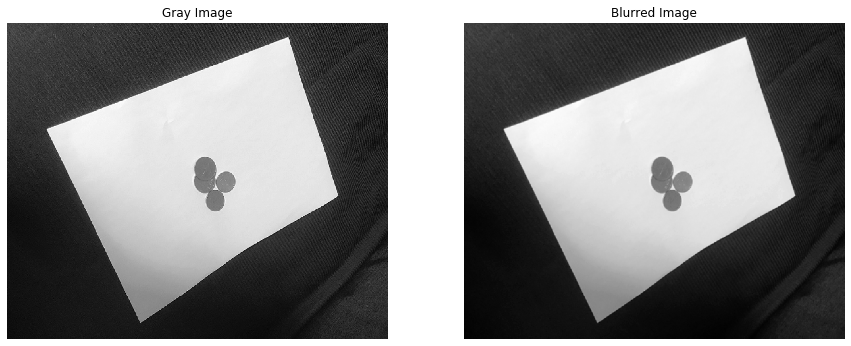

In [2]:
# Blurring

dst = cv2.bilateralFilter(img_gray, 10, 100, 100) # Bilateral Filtering
dst1 = cv2.GaussianBlur(img_gray, (5,5), 0)       # GaussianBlur
dst2 = cv2.medianBlur(img_gray, 9)                # Median Blur


plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(img_gray, cmap='gray'), plt.title('Gray Image'), plt.axis('off')
plt.subplot(122), plt.imshow(dst1, cmap='gray'), plt.title('Blurred Image'), plt.axis('off')
plt.show()

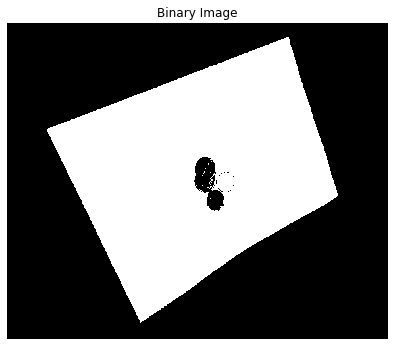

In [3]:
# Thresholding

ret_threshold, binary_img = cv2.threshold(img_gray,
                                          130,
                                          255,
                                          cv2.THRESH_BINARY_INV)
binary_img = cv2.bitwise_not(binary_img)


plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(binary_img, cmap='gray'), plt.title('Binary Image'), plt.axis('off')
plt.show()

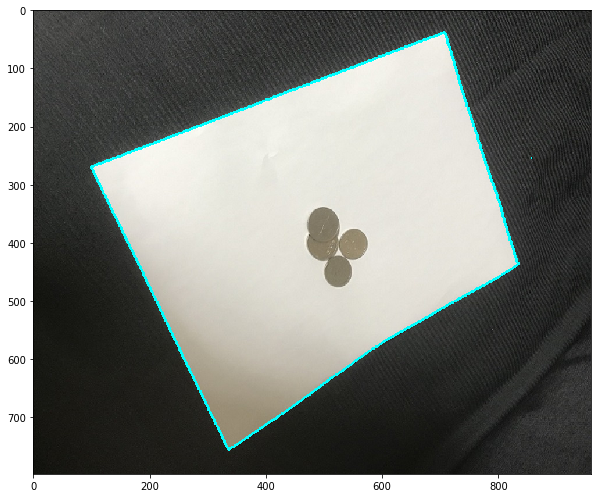

In [4]:
ret_img, contour, hierarchy = cv2.findContours(binary_img, 
                                            cv2.RETR_EXTERNAL, 
                                            cv2.CHAIN_APPROX_SIMPLE)

img = img_ori.copy()
cv2.drawContours(img, contour, -1, (255,255,0), 3)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

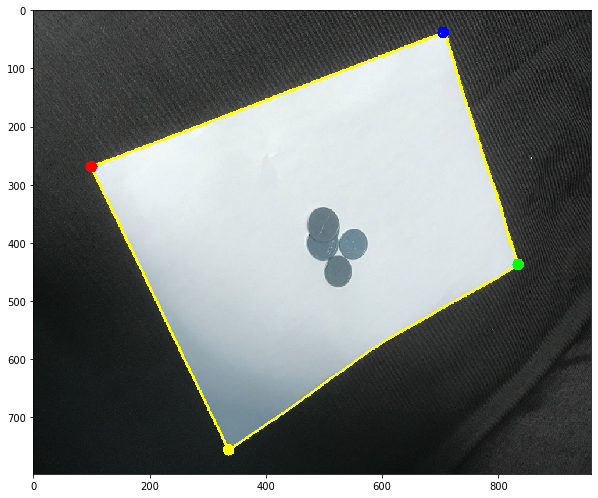

In [5]:
cnt = contour[-1]

#좌표점의 순서는 빨->검->파->녹
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

# 좌표 표시하기
cv2.circle(img, leftmost, 10, (255,0,0), -1)        # 빨강
cv2.circle(img, rightmost, 10, (0,255,0), -1)       # 녹색
cv2.circle(img, topmost, 10, (0,0,255), -1)         # 파랑
cv2.circle(img, bottommost, 10, (255,255,0), -1)    # 노랑

img = cv2.drawContours(img, cnt, 2, (0,255,255), 1)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

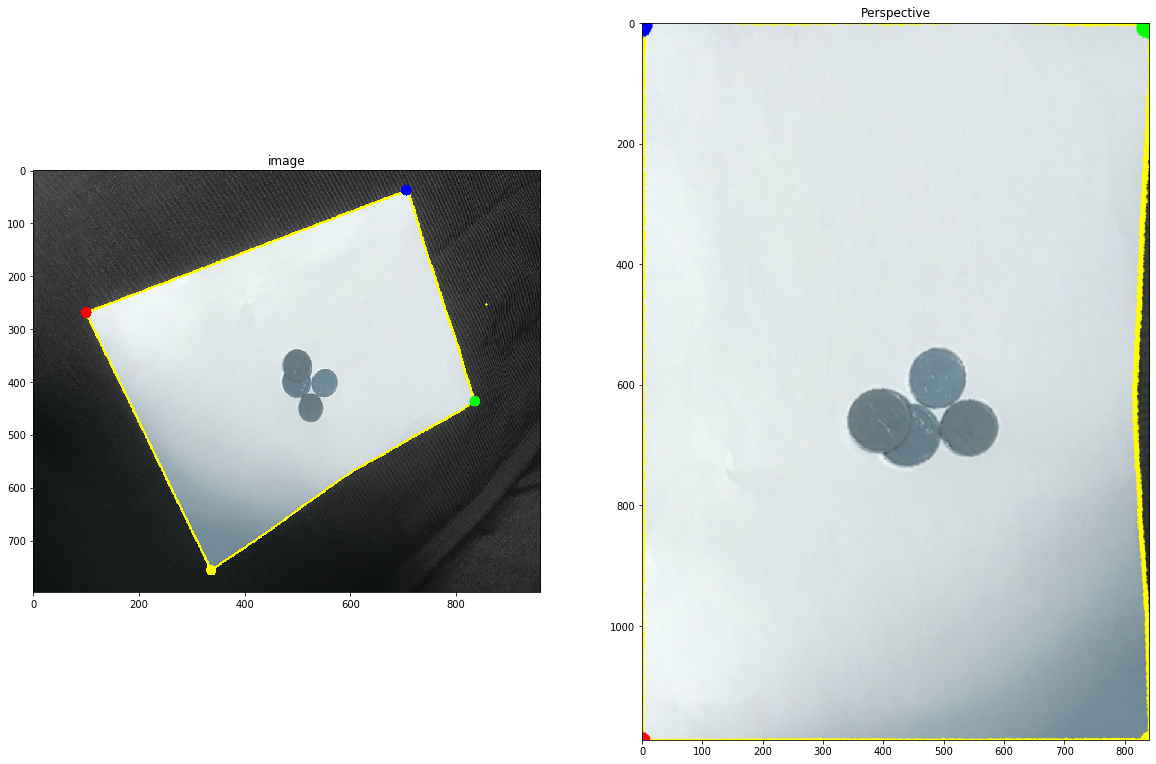

True

In [6]:
pts1 = np.float32([topmost, leftmost, rightmost, bottommost])

# 좌표의 이동점
pts2 = np.float32([[0,0], [0,1189], [841,0], [841,1189]])

M = cv2.getPerspectiveTransform(pts1, pts2)

# A4용지의 size로 종이 맞추기
dst = cv2.warpPerspective(img, M, (841,1189))

plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()

# 이미지 저장하기
cv2.imwrite('done.jpg', dst)

#cv2.imshow('result',dst)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# (2) 겹친 동전 검출 (안겹쳐도 검출)
## ----------------동전이 겹쳤을 경우까지 하고싶으면 넣는 코드-------------------

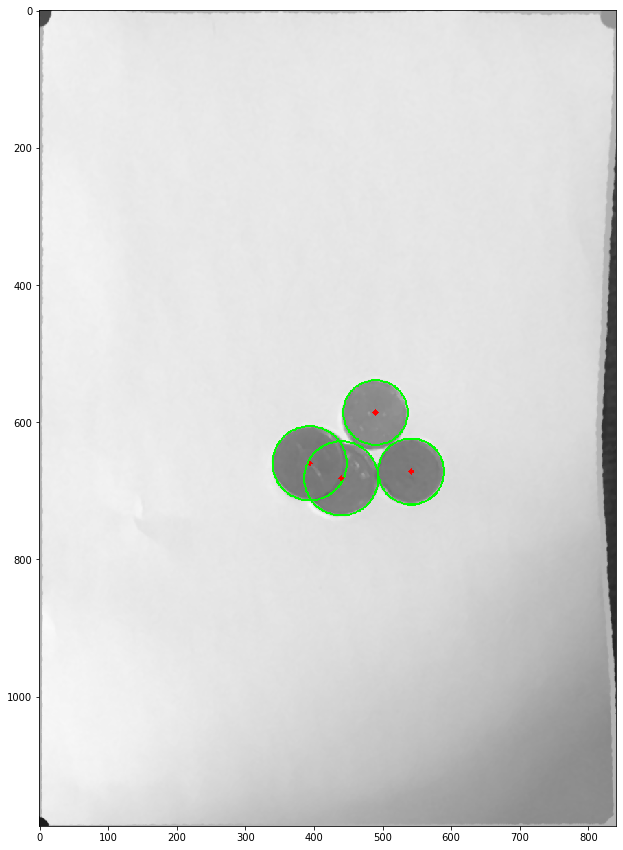

In [7]:
# 방법 1) 한번에 찾는 방법

overlap = cv2.imread('done.jpg', 0)              # 위에서까지 실행한 이미지를 'done.jpg'라고 저장하고, overlap에 불러옴
overlap = cv2.medianBlur(overlap, 5)             # Blur 처리해서 noise를 제거한다
cimg = cv2.cvtColor(overlap, cv2.COLOR_GRAY2BGR)

# 겹친 동전의 모양까지 원으로 검출하는 기준을 정의한다
circles = cv2.HoughCircles(overlap, cv2.HOUGH_GRADIENT, 1, 50, np.array([]), param1=50, param2=25, minRadius=24, maxRadius=90)
circles = np.uint16(np.around(circles))

# 위 조건에 맞춰 cimg에 원을 그린다
for circ in circles[0,:]:
    cv2.circle(cimg, (circ[0], circ[1]), circ[2], (0,255,0) ,2)
    cv2.circle(cimg, (circ[0], circ[1]), 2, (255,0,0), 3)


# 원형의 컨투어가 따인 cimg 출력
cv2.imshow('img', cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(15,15))
plt.imshow(cimg)
plt.show()

In [8]:
# 방법 2) 함수로 정의해서 원을 하나씩 순차적으로 찾는 방법 (한번에 찾게 수정해도 됨)
# 원을 찾지 못할 경우까지 고려
# 순서가 헷갈리니까 찾을 때 순서를 나타내는 숫자를 넣어야 할까

def findCircle():
    overlap = cv2.imread('done.jpg', 0)
    overlap = cv2.medianBlur(overlap, 5)
    cimg = cv2.cvtColor(overlap, cv2.COLOR_GRAY2BGR)
    
    circles = cv2.HoughCircles(overlap, cv2.HOUGH_GRADIENT, 1, 50, np.array([]),
                               param1=50, param2=25, minRadius=24, maxRadius=90)
    circles = np.uint16(np.around(circles))
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        
        for circ in circles[0,:]:
            cv2.circle(cimg, (circ[0], circ[1]), circ[2], (0,255,0), 2)
            cv2.circle(cimg, (circ[0], circ[1]), 2, (255,0,0), 3)
            
            cv2.imshow('Circles detected', cimg)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            
            plt.figure(figsize=(5,5))
            plt.imshow(cimg), plt.axis('off')            
    else:
        print('원을 찾을 수 없음')
    
    plt.show()

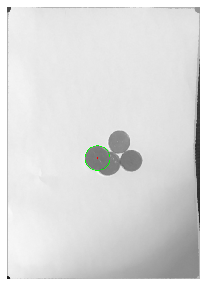

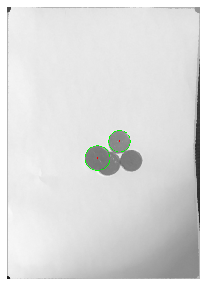

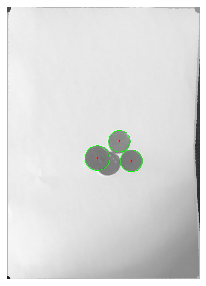

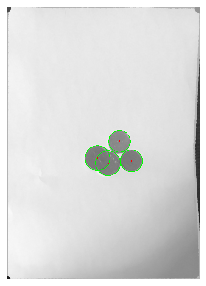

In [9]:
findCircle()

In [56]:
# 동전 좌표 확인하기

count = circles[0,:]        # 인식된 원의 개수를 count라고 지정한다
# len(count)                  # 인식된 원의 개수를 세어서 반환한다
c_array = circles.reshape(len(count), -1)                      # 검출된 원의 개수를 행의 개수로 하는 배열을 array라고 지정한다
radiusSet = c_array[:,-1]

print('\n동전의 (x좌표, y좌표, 반지름) 배열: \n', c_array)     # 여기서 x,y좌표는 원의 중심의 좌표를 의미함
print('\n동전의 반지름 리스트: \n', radiusSet)


동전의 (x좌표, y좌표, 반지름) 배열: 
 [[394 660  54]
 [490 586  47]
 [542 672  48]
 [440 682  54]]

동전의 반지름 리스트: 
 [54 47 48 54]


# (3) 동전 종류 판별하기

In [54]:
# 동전 판별하기

# 여기서 동전 판별 기준은 대충 잡았는데 이거 같이 수정수정
# 도대체 반지름 기준을 어케해야 정확할까용

fivehund = 0
onehund = 0
fifty = 0
ten = 0

for j in radiusSet:   
    if j >= 50:
        fivehund += 1
    elif j >= 40:
        onehund += 1
    elif j >= 30:
        fifty += 1
    else:
        ten += 1

# (4) 총액 계산하기

In [55]:
# 총액 계산하기

total = (500*fivehund + 100*onehund + 50*fifty + 10*ten)

print("500원: ", fivehund,
      "\n100원: ", onehund,
      "\n50원: ",fifty,
      "\n10원: ", ten)
print("동전 총합: ", total)

500원:  2 
100원:  2 
50원:  0 
10원:  0
동전 총합:  1200
